In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from scipy.stats import pearsonr

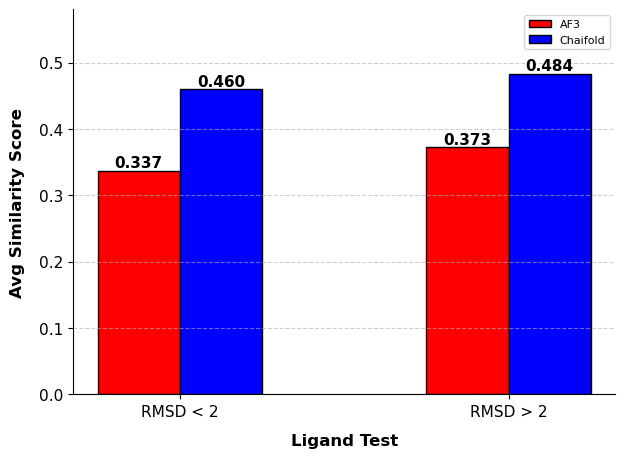

In [3]:
file_path_af3 = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"  # Replace with the path to your Excel file
data_af3 = pd.read_excel(file_path_af3)
file_path_chai = "/Users/JB/Rotation_bkslab/250115_chaifold/20241209_mac1.xlsx"  # Replace with the path to your Excel file
data_chai = pd.read_excel(file_path_chai)

# Extract two columns for analysis
lig_sim_af3 = data_af3.iloc[:, 5]  # ligand similarity score
l_rmsd_af3 = data_af3.iloc[:, 12]  # ligand RMSD
l_plddt_af3 = data_af3.iloc[:, 13] # ligand pLDDT

lig_sim_chai = data_chai.iloc[:, 4]  # ligand similarity score
l_rmsd_chai = data_chai.iloc[:, 9]  # ligand RMSD
l_iptm_chai = data_chai.iloc[:, 15] #ligand ipTM

below_thres_af3 = []
above_thres_af3 = []
below_thres_chai = []
above_thres_chai = []

for l,p,s in zip(l_rmsd_af3, l_plddt_af3, lig_sim_af3):
    if pd.notna(l):
        if l <= 2 and p >= 80:
            below_thres_af3.append(s)
        if l >= 2 and p <= 80:
            above_thres_af3.append(s)

avg_success_af3 = sum(below_thres_af3)/len(below_thres_af3)
avg_fail_af3 = sum(above_thres_af3)/len(above_thres_af3)

for l,p,s in zip(l_rmsd_chai, l_iptm_chai, lig_sim_chai):
    if pd.notna(l):
        if l <= 2 and p >= 0.8:
            below_thres_chai.append(s)
        if l >= 2 and p <= 0.8:
            above_thres_chai.append(s)

avg_success_chai = sum(below_thres_chai)/len(below_thres_chai)
avg_fail_chai = sum(above_thres_chai)/len(above_thres_chai)

categories = ["RMSD < 2", "RMSD > 2"]
avg_score_af3 = [avg_success_af3, avg_fail_af3]
avg_score_chai = [avg_success_chai, avg_fail_chai]


# Define bar width
bar_width = 0.25

# Define x positions for bars
x = np.arange(len(categories))

# Create improved bar chart with side-by-side bars
plt.figure(figsize=(7, 5))

# Plot AF3 bars (red)
plt.bar(x - bar_width / 2, avg_score_af3, color='red', width=bar_width, edgecolor='black', label='AF3')

# Plot Chaifold bars (blue)
plt.bar(x + bar_width / 2, avg_score_chai, color='blue', width=bar_width, edgecolor='black', label='Chaifold')

# Add value labels on top of bars
for i in range(len(categories)):
    plt.text(x[i] - bar_width / 2, avg_score_af3[i], f'{avg_score_af3[i]:.3f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')
    plt.text(x[i] + bar_width / 2, avg_score_chai[i], f'{avg_score_chai[i]:.3f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Add labels and title with improved formatting
plt.xlabel("Ligand Test", fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel("Avg Similarity Score", fontsize=12, fontweight='bold', labelpad=10)

# Improve x and y-axis visibility
plt.xticks(x, categories, fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, max(max(avg_score_af3), max(avg_score_chai)) * 1.2)  # Adjust y-axis limit for better visibility

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
plt.legend(fontsize=8, loc='upper right')

# Show improved plot
plt.show()


ValueError: Axis limits cannot be NaN or Inf

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


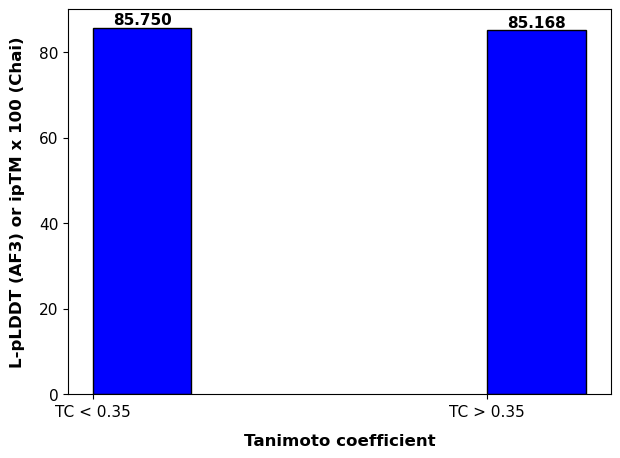

In [36]:
file_path_af3 = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"  # Replace with the path to your Excel file
data_af3 = pd.read_excel(file_path_af3)
file_path_chai = "/Users/JB/Rotation_bkslab/250115_chaifold/20241209_mac1.xlsx"  # Replace with the path to your Excel file
data_chai = pd.read_excel(file_path_chai)

# Extract two columns for analysis
lig_sim_af3 = data_af3.iloc[:, 5]  # ligand similarity score
l_rmsd_af3 = data_af3.iloc[:, 11]  # ligand RMSD
l_plddt_af3 = data_af3.iloc[:, 12] # ligand pLDDT

lig_sim_chai = data_chai.iloc[:, 4]  # ligand similarity score
l_rmsd_chai = data_chai.iloc[:, 8]  # ligand RMSD
l_iptm_chai = data_chai.iloc[:, 14] #ligand ipTM

below_thres_af3 = []
above_thres_af3 = []
below_thres_chai = []
above_thres_chai = []

for l,p,s in zip(l_rmsd_af3, l_plddt_af3, lig_sim_af3):
    if pd.notna(l):
        if s <= 0.35:
            below_thres_af3.append(p)
        if s > 0.35:
            above_thres_af3.append(p)

avg_success_af3 = sum(below_thres_af3)/len(below_thres_af3)
avg_fail_af3 = sum(above_thres_af3)/len(above_thres_af3)

for l,p,s in zip(l_rmsd_chai, l_iptm_chai, lig_sim_chai):
    if pd.notna(l):
        if s <= 0.35:
            below_thres_chai.append(p)
        if s > 0.35:
            above_thres_chai.append(p)

avg_success_chai = 100*sum(below_thres_chai)/len(below_thres_chai)
avg_fail_chai = 100*sum(above_thres_chai)/len(above_thres_chai)

categories = ["TC < 0.35", "TC > 0.35"]
avg_score_af3 = [avg_success_af3, avg_fail_af3]
avg_score_chai = [avg_success_chai, avg_fail_chai]


# Define bar width
bar_width = 0.25

# Define x positions for bars
x = np.arange(len(categories))

# Create improved bar chart with side-by-side bars
plt.figure(figsize=(7, 5))

# Plot AF3 bars (red)
plt.bar(x - bar_width / 2, avg_score_af3, color='red', width=bar_width, edgecolor='black', label='AF3')

# Plot Chaifold bars (blue)
plt.bar(x + bar_width / 2, avg_score_chai, color='blue', width=bar_width, edgecolor='black', label='Chaifold')

# Add value labels on top of bars
for i in range(len(categories)):
    plt.text(x[i] - bar_width / 2, avg_score_af3[i], f'{avg_score_af3[i]:.3f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')
    plt.text(x[i] + bar_width / 2, avg_score_chai[i], f'{avg_score_chai[i]:.3f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Add labels and title with improved formatting
plt.xlabel("Tanimoto coefficient", fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel("L-pLDDT (AF3) or ipTM x 100 (Chai)", fontsize=12, fontweight='bold', labelpad=10)

# Improve x and y-axis visibility
plt.xticks(x, categories, fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, max(max(avg_score_af3), max(avg_score_chai)) * 1.2)  # Adjust y-axis limit for better visibility

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=8, loc='upper right')

# Show improved plot
plt.show()


-0.19245301545113686 4.676363789795568e-06


/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_41243/1951937053.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


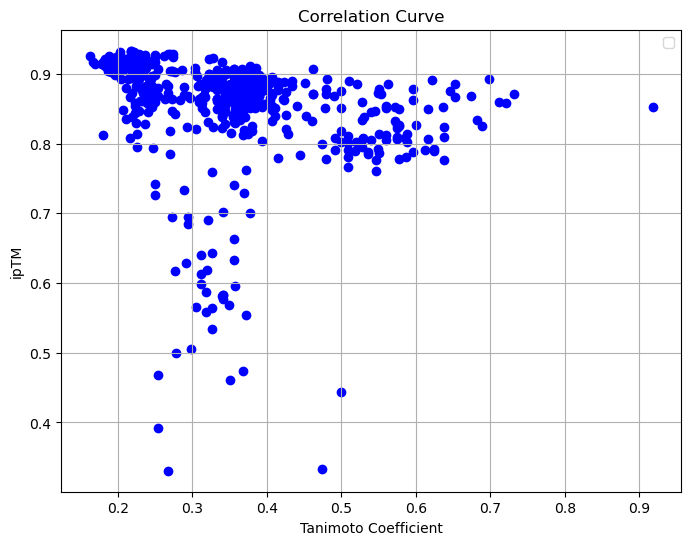

In [15]:
# Generate sample data
file_path = "/Users/JB/Rotation_bkslab/250115_chaifold/20241209_mac1.xlsx"  # Replace with the path to your Excel file
data = pd.read_excel(file_path)

# Extract x and y columns
x = data.iloc[:, 5]
y = data.iloc[:, 15]

df_cleaned = pd.DataFrame({'x': x, 'y': y}).dropna()
x1 = df_cleaned['x']
y1 = df_cleaned['y']


# Calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(x1, y1)
print(correlation_coefficient, p_value)
# Plot the correlation curve
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, color='blue')
plt.title('Correlation Curve')
plt.xlabel('Tanimoto Coefficient')
plt.ylabel('ipTM')
plt.legend()
plt.grid(True)
plt.show()

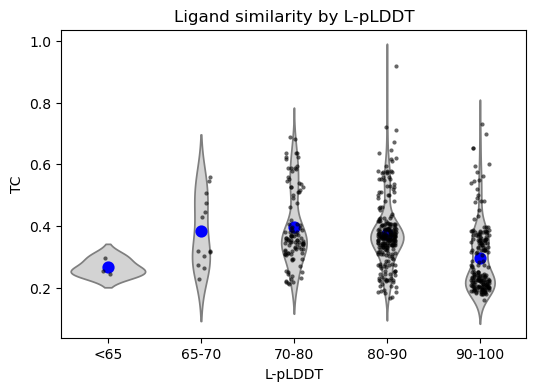

In [21]:
# Define pLDDT bins and labels
bins = [0, 65, 70, 80, 90, 100]  # Ensure TC values fall within this range
labels = ["<65", "65-70", "70-80", "80-90", "90-100"]

# Create DataFrame
df = pd.DataFrame({"L-pLDDT": x, "TC": y})

# Assign each TC value to a bin
df["L-pLDDT group"] = pd.cut(df["L-pLDDT"], bins=bins, labels=labels, include_lowest=True)

# Check for NaN values in binning
nan_count = df["L-pLDDT group"].isna().sum()
if nan_count > 0:
    print(f"Warning: {nan_count} values in 'TC' are out of bin range and were not assigned to a group.")

# Count number of data points in each bin
bin_counts = df["L-pLDDT group"].value_counts().sort_index()

# Compute statistics (mean, std) for each bin (Fix: Added observed=False)
stats = df.groupby("L-pLDDT group", observed=False)["TC"].agg(["mean", "std"]).reset_index()

# Create the violin plot with adjusted figure size
plt.figure(figsize=(6, 4))  # Reduced size for compact visualization

# Violin plot for density distribution
sns.violinplot(x="L-pLDDT group", y="TC", data=df, inner=None, color="lightgray")  

# Strip plot to show individual data points
sns.stripplot(x="L-pLDDT group", y="TC", data=df, jitter=True, size=3, alpha=0.6, color="black")  

# Mean with error bars (standard deviation)
sns.pointplot(x="L-pLDDT group", y="mean", data=stats, 
              linestyle="none", color="blue", markers="o", capsize=0.2, 
              err_kws={'linewidth': 1.5}, errorbar="sd")

# Add labels and title
plt.xlabel("L-pLDDT")
plt.ylabel("TC")
plt.title("Ligand similarity by L-pLDDT")

# Show plot
plt.show()

Number of data points in each TC bin:
TC Group
<0.3         176
0.3 - 0.5    303
0.5 - 0.7     67
>0.7           4
Name: count, dtype: int64

Statistics (Mean, Median & Standard Deviation) for L-pLDDT in each TC bin:
    TC Group      mean    median       std
0       <0.3  0.732728  0.438827  0.641206
1  0.3 - 0.5  1.003987  0.985964  0.624684
2  0.5 - 0.7  1.116142  1.078287  0.707710
3       >0.7  0.580379  0.561798  0.418756


/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_72999/2374535799.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False, fontsize=12, loc='upper right')


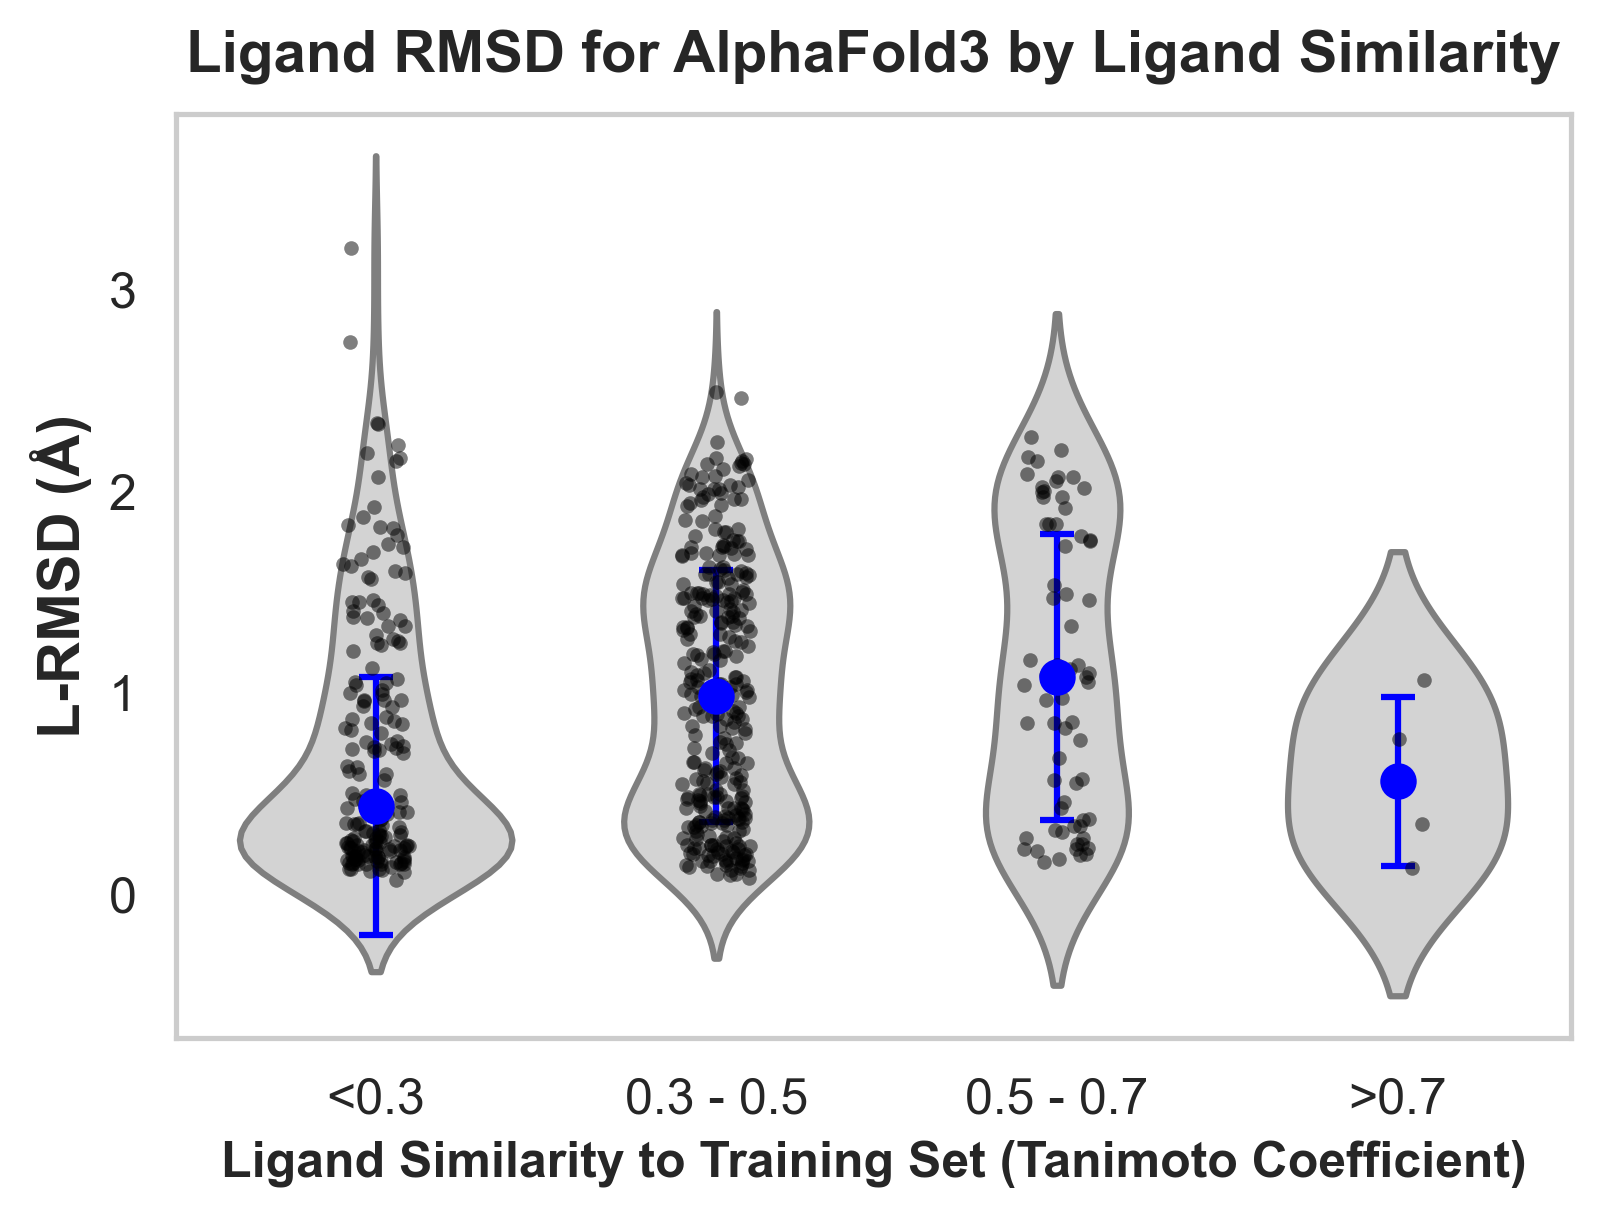

In [4]:
file_path = "/Users/JB/Rotation_bkslab/250203_alphafold3/20241209_mac1.xlsx"
data = pd.read_excel(file_path)

x = data.iloc[:, 5] #RMSD_AF3
y = data.iloc[:, 12] #Dock

# Define TC bins and labels
bins = [0, 0.3, 0.5, 0.7, 1]  # Ensure TC values fall within this range
labels = ["<0.3", "0.3 - 0.5", "0.5 - 0.7", ">0.7"]

# Create DataFrame
df = pd.DataFrame({"L-pLDDT": y, "TC": x}).dropna()
df["TC Group"] = pd.cut(df["TC"], bins=bins, labels=labels, include_lowest=True)

# Check for NaN values in binning
nan_count = df["TC Group"].isna().sum()
if nan_count > 0:
    print(f"Warning: {nan_count} values in 'TC' are out of bin range and were not assigned to a group.")

# Count number of data points in each bin
bin_counts = df["TC Group"].value_counts().sort_index()

# Compute statistics (mean, median, std) for each bin
stats = df.groupby("TC Group", observed=False)["L-pLDDT"].agg(["mean", "median", "std"]).reset_index()

# Print results
print("Number of data points in each TC bin:")
print(bin_counts)
print("\nStatistics (Mean, Median & Standard Deviation) for L-pLDDT in each TC bin:")
print(stats)

# Set **Nature-style** aesthetics
sns.set(style="whitegrid", context="notebook")  # Clean background
plt.figure(figsize=(6, 4), dpi=300)  # High-resolution figure for publication

# Violin plot for **density distribution**
sns.violinplot(x="TC Group", y="L-pLDDT", data=df, inner=None, color="lightgray", linewidth=1.5)

# Strip plot to show **individual data points**
sns.stripplot(x="TC Group", y="L-pLDDT", data=df, jitter=True, size=3.5, alpha=0.5, color="black")

# Plot **median and standard deviation as error bars**
for i, tc_group in enumerate(stats["TC Group"]):
    median_val = stats.loc[stats["TC Group"] == tc_group, "median"].values[0]
    std_val = stats.loc[stats["TC Group"] == tc_group, "std"].values[0]
    
    # Plot median as **blue dot**
    plt.scatter(i, median_val, color="blue", s=60, zorder=3, label="" if i == 0 else "")  
    
    # Plot error bars (standard deviation)
    plt.errorbar(i, median_val, yerr=std_val, color="blue", capsize=4, capthick=1.5, fmt='none', linewidth=1.5, zorder=2)

# **Nature-style figure formatting**
plt.xlabel("Ligand Similarity to Training Set (Tanimoto Coefficient)", fontsize=12, fontweight='bold', fontname='Arial')
plt.ylabel("L-RMSD (Å)", fontsize=14, fontweight='bold', fontname='Arial')
plt.title("Ligand RMSD for AlphaFold3 by Ligand Similarity", fontsize=14, fontweight='bold', fontname='Arial', pad=10)
plt.xticks(fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')

# Remove unnecessary **gridlines** for a clean look
plt.grid(False)

# Ensure **ticks appear outside the axis**
plt.tick_params(axis='both', direction='out', length=6, width=1.5, top=False, right=False)

# Add **legend** for median representation
plt.legend(frameon=False, fontsize=12, loc='upper right')

# Save figure as **high-quality publication format**
plt.savefig("L-pLDDT_by_Ligand_Similarity.svg", format="svg", dpi=300, bbox_inches='tight')  # Vector format
plt.savefig("L-pLDDT_by_Ligand_Similarity.png", format="png", dpi=600, bbox_inches='tight')  # High-resolution PNG

# Show final **Nature-style** figure
plt.show()